In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics, random_projection
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer
from joblib import dump, load

### Loading an example dataset

In [2]:
digits = datasets.load_digits()

In [3]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
digits.data.shape

(1797, 64)

In [5]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

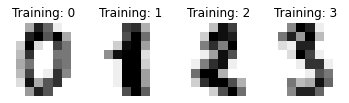

In [7]:
_, axes = plt.subplots(1, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes, images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Training: {label}")

### Learning and predicting

In [8]:
clf = svm.SVC(gamma=0.001, C=100)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                    test_size=0.5, shuffle=False)

In [10]:
clf.fit(X_train, y_train)

SVC(C=100, gamma=0.001)

In [11]:
predicted = clf.predict(X_test)

In [12]:
images_and_predictions = list(zip(digits.images[len(digits.images) // 2:], predicted))

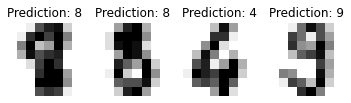

In [13]:
_, axes = plt.subplots(1, 4)
for ax, (image, prediction) in zip(axes, images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [14]:
print(f"Classification report for classifier {clf}:\n \
{metrics.classification_report(y_test, predicted)}")

Classification report for classifier SVC(C=100, gamma=0.001):
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.96      0.97        91
           2       0.99      0.99      0.99        86
           3       0.98      0.90      0.94        91
           4       0.99      0.96      0.97        92
           5       0.95      0.96      0.95        91
           6       0.99      0.99      0.99        91
           7       0.98      0.99      0.98        89
           8       0.94      1.00      0.97        88
           9       0.92      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



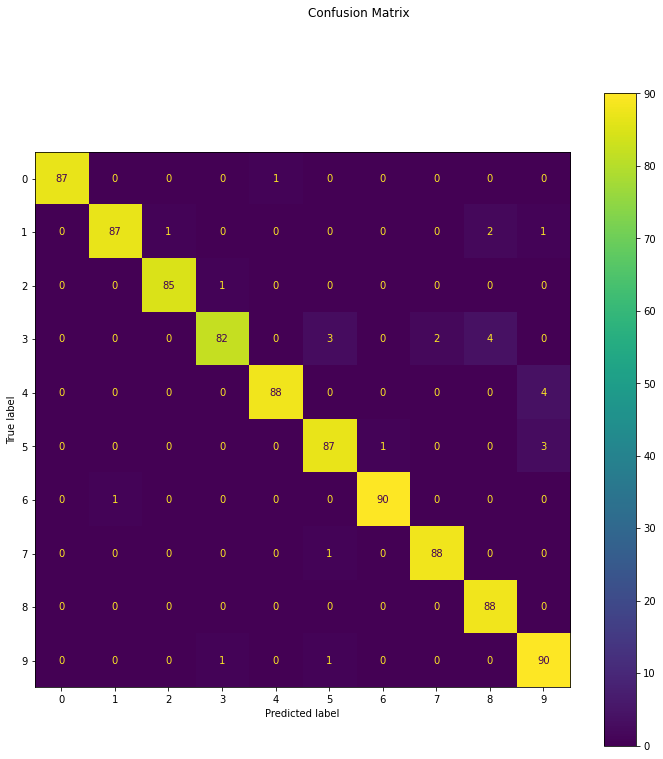

In [15]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
disp.figure_.set_figheight(12)
disp.figure_.set_figwidth(12)
plt.show()

### Model persistence

In [16]:
s = pickle.dumps(clf)
s[:5]

b'\x80\x03csk'

In [17]:
clf2 = pickle.loads(s)
clf2.predict(X_test[:1])

array([8])

In [18]:
y_test[0]

8

In [19]:
dump(clf, "filename.joblib")

['filename.joblib']

In [20]:
clf = load("filename.joblib")

### Conventions

In [21]:
rng = np.random.RandomState(0)

In [22]:
X = rng.rand(10, 2000)

In [23]:
X = np.array(X, dtype="float32")

In [24]:
print(X.shape)
print(X.dtype)

(10, 2000)
float32


In [25]:
transformer = random_projection.GaussianRandomProjection()

In [26]:
X_new = transformer.fit_transform(X)
print(X_new.shape)
print(X_new.dtype)

(10, 1973)
float64


In [27]:
iris = datasets.load_iris()

In [28]:
clf = svm.SVC()

In [29]:
clf.fit(iris.data, iris.target)

SVC()

In [30]:
list(clf.predict(iris.data[:3]))

[0, 0, 0]

In [31]:
clf.fit(iris.data, iris.target_names[iris.target])

SVC()

In [32]:
list(clf.predict(iris.data[:3]))

['setosa', 'setosa', 'setosa']

In [33]:
X, y = datasets.load_iris(return_X_y=True)

In [34]:
clf = svm.SVC()

In [35]:
clf.set_params(kernel="linear").fit(X, y)

SVC(kernel='linear')

In [36]:
clf.predict(X[:5])

array([0, 0, 0, 0, 0])

In [37]:
clf.set_params(kernel="rbf").fit(X, y)

SVC()

In [38]:
clf.predict(X[:5])

array([0, 0, 0, 0, 0])

In [39]:
X = [[1, 2], [2, 4], [4, 5], [3, 2], [3, 1]]
y = [0, 0, 1, 1, 2]

In [40]:
clf = OneVsRestClassifier(estimator=svm.SVC(random_state=0))
clf.fit(X, y).predict(X)

array([0, 0, 1, 1, 2])

In [41]:
y = LabelBinarizer().fit_transform(y)
y

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [42]:
clf.fit(X, y).predict(X)

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [43]:
y = [[0, 1], [0, 2], [1, 3], [0, 2, 3], [2, 4]]
y = MultiLabelBinarizer().fit_transform(y)

In [44]:
y

array([[1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 1, 0],
       [0, 0, 1, 0, 1]])

In [45]:
clf.fit(X, y).predict(X)

array([[1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 0, 0],
       [1, 0, 1, 0, 0]])